# TASK I-
    Use linear regression and SVM (with Linear kernel) and Random Forest(with a maximum depth of your choice) algorithms 
    to classify the hand-written numbers in 10 output classes (0-9) (5 pts-Mandatory)

In [12]:
#importing libraries

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader

#from sklearn import datasets 
# # Import train_test_split function
from sklearn.model_selection import train_test_split  
#Import scikit-learn dataset library
from sklearn import svm #Import svm model
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt

import numpy as np

In [13]:
#Section I-importing data load the dataset, split into input (X) and output (y) variables. 
# loading training data
train_dataset = datasets.MNIST(root='./data', 
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=True)
# loading test data, IGNORING UNTIL LATER
test_dataset = datasets.MNIST(root='./data', 
                              train=False, 
                              transform=transforms.ToTensor())

X_train = [train_dataset[i][0].flatten().tolist() for i in range(len(train_dataset))]  # Convert images to lists of 784 features
y_train = [train_dataset[i][1] for i in range(len(train_dataset))]  # Get the labels
X_test = [test_dataset[i][0].flatten().tolist() for i in range(len(test_dataset))]  # Convert images to lists of 784 features
y_test = [test_dataset[i][1] for i in range(len(test_dataset))]  # Get the labels


### Linear Regression


In [3]:
# Convert data to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)  
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

#Splitting into train and validation datasets with 67% trainset and 33% validation set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


#Section II-defining the model:  linear regression model with 2 layers, input and output
model = nn.Sequential(
  nn.Linear(784, 10) # 784 input features (28x28 pixels flattened) → 10 output classes (digits 0-9)
  #,nn.Sigmoid()
)
#printing model layers and specifications
print(model)

#Secion III-training the model
n_epochs = 10
batch_size = 32
history = []
# define loss function
loss_fn = nn.MSELoss()
# define optimizer with a spicific learning rate
optimizer = optim.Adam(model.parameters(), lr=0.001)
for epoch in range(n_epochs):
  for i in range(0, len(X_train), batch_size):
        # take a batch
        Xbatch = X_train[i:i+batch_size]
        ybatch = y_train[i:i+batch_size]
        # forward pass
        y_pred =model(Xbatch) #  torch.max(model(Xbatch), 1)
        loss = loss_fn(y_pred, ybatch)
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        # update weights
        optimizer.step()

  model.eval()
  y_pred = model(X_test)
  mse = loss_fn(y_pred, y_test)
  #mse_train = loss_fn(y_, y_test)
  mse = float(mse)
  history.append(mse)
  print(f'Finished epoch {epoch}, latest MSE {mse}')

print('Final MSE:', history[-1])
print('Total MSE:', sum(history)/len(history))

Sequential(
  (0): Linear(in_features=784, out_features=10, bias=True)
)


c:\Users\ellin\OneDrive\Documents\MSc_IoT_MAU\DA642E-AI-and-Data-Management-for-IOT\.venv\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\ellin\OneDrive\Documents\MSc_IoT_MAU\DA642E-AI-and-Data-Management-for-IOT\.venv\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([10000, 1])) that is different to the input size (torch.Size([10000, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Finished epoch 0, latest MSE 3.824841260910034
Finished epoch 1, latest MSE 3.570342540740967
Finished epoch 2, latest MSE 3.43465256690979
Finished epoch 3, latest MSE 3.348628044128418
Finished epoch 4, latest MSE 3.2921831607818604
Finished epoch 5, latest MSE 3.255141496658325
Finished epoch 6, latest MSE 3.2310068607330322
Finished epoch 7, latest MSE 3.2153942584991455
Finished epoch 8, latest MSE 3.2053518295288086
Finished epoch 9, latest MSE 3.198923110961914
Final MSE: 3.198923110961914
Total MSE: 3.3576465129852293


In [4]:
#Section IV-evaluating the model
# compute accuracy (no_grad is optional)
with torch.no_grad():
    y_pred = model(X_train)
accuracy = (y_pred.round() == y_train).float().mean()
print(f"Accuracy {accuracy}")

Accuracy 0.24133999645709991


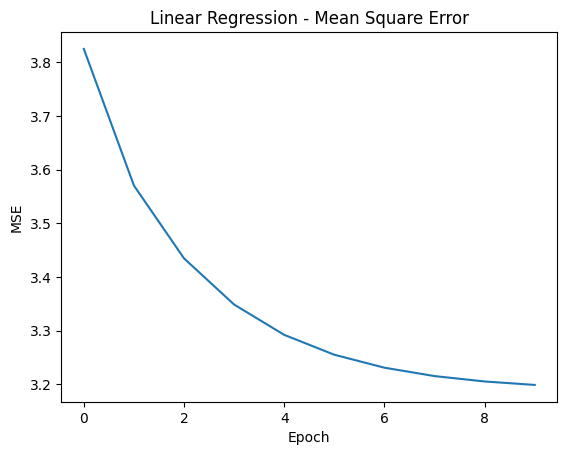

In [5]:
#Section V-visualizing the outputs
plt.plot(history)
plt.title('Linear Regression - Mean Square Error')
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.show()

### SVM

In [8]:
#Create a svm Classifier with Linear Kernel
clf = svm.SVC(kernel='linear') 
#Train the model using the training sets
clf.fit(X_train, y_train) 
#Predict the response for test dataset 
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision and Recall: what percentage of positive tuples are labeled as such? 
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted')) 
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))

Accuracy: 0.9404
Precision: 0.9404744228503641
Recall: 0.9404


In [10]:
# Ensure predictions are 1D
y_pred = np.array(y_pred).flatten()  
y_test = np.array(y_test).flatten()

# Convert data to tensors
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)
y_pred = torch.tensor(y_pred, dtype=torch.float32).reshape(-1, 1)

# Debugging, data shapes and unique labels
print(f"y_test shape: {y_test.shape}")
print(f"y_pred shape: {y_pred.shape}")
print(f"y_test unique labels: {set(y_test.numpy().flatten())}")
print(f"y_pred unique labels: {set(y_pred.numpy().flatten())}")
print(f"y_test length: {len(y_test)}")
print(f"y_pred length: {len(y_pred)}")

history_SVM = []  ## list not needed as model only produces one MSE value
# define loss function
loss_fn = nn.MSELoss()
mse = loss_fn(y_pred, y_test).item()
#mse_train = loss_fn(y_, y_test)
mse = float(mse)
history_SVM.append(mse) ##

print('Final MSE:', history_SVM[-1])

y_test shape: torch.Size([10000, 1])
y_pred shape: torch.Size([10000, 1])
y_test unique labels: {np.float32(0.0), np.float32(1.0), np.float32(2.0), np.float32(3.0), np.float32(4.0), np.float32(5.0), np.float32(6.0), np.float32(7.0), np.float32(8.0), np.float32(9.0)}
y_pred unique labels: {np.float32(0.0), np.float32(1.0), np.float32(2.0), np.float32(3.0), np.float32(4.0), np.float32(5.0), np.float32(6.0), np.float32(7.0), np.float32(8.0), np.float32(9.0)}
y_test length: 10000
y_pred length: 10000
Final MSE: 1.014299988746643


C:\Users\ellin\AppData\Local\Temp\ipykernel_15348\2897991513.py:2: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  y_pred = np.array(y_pred).flatten()
C:\Users\ellin\AppData\Local\Temp\ipykernel_15348\2897991513.py:3: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  y_test = np.array(y_test).flatten()


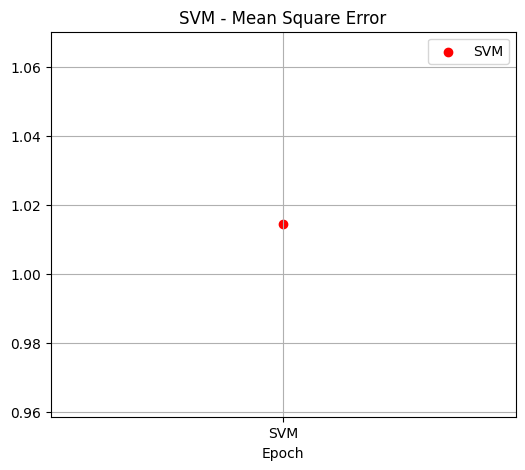

In [11]:
# visualizing the outputs
plt.figure(figsize=(6, 5))
plt.scatter(["SVM"], [history_SVM], color='red')

plt.plot(history_SVM)
plt.title('SVM - Mean Square Error')
plt.xlabel("Epoch")
plt.ylabel("")
plt.grid(True)
plt.legend(["SVM"])
plt.show()

### Random Forest

In [14]:
"""#Load dataset 
train_dataset = datasets.MNIST(root='./data', 
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=True)

# loading test data
test_dataset = datasets.MNIST(root='./data', 
                              train=False, 
                              transform=transforms.ToTensor())"""

# 🔹 Extract input (X) and output (y) for training data
X_train = np.array([train_dataset[i][0].numpy().flatten() for i in range(len(train_dataset))])  # Flatten images
y_train = np.array([train_dataset[i][1] for i in range(len(train_dataset))])  # Get labels

# 🔹 Extract input (X) and output (y) for testing data
X_test = np.array([test_dataset[i][0].numpy().flatten() for i in range(len(test_dataset))])  # Flatten images
y_test = np.array([test_dataset[i][1] for i in range(len(test_dataset))])  # Get labels

# 🔹 Train Random Forest Classifier
clf = RandomForestClassifier(max_depth=10, random_state=42)  # Increase max_depth for better accuracy
clf.fit(X_train, y_train)

# 🔹 Make predictions
y_pred = clf.predict(X_test)

# 🔹 Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9486


In [15]:
# Ensure predictions are 1D
y_pred = np.array(y_pred).flatten()  
y_test = np.array(y_test).flatten()

# Convert data to tensors
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)
y_pred = torch.tensor(y_pred, dtype=torch.float32).reshape(-1, 1)

# Debugging, dataset sizes and unique labels
print(f"y_test shape: {y_test.shape}")
print(f"y_pred shape: {y_pred.shape}")
print(f"y_test unique labels: {set(y_test.numpy().flatten())}")
print(f"y_pred unique labels: {set(y_pred.numpy().flatten())}")
print(f"y_test length: {len(y_test)}")
print(f"y_pred length: {len(y_pred)}")

history_RForest = []  
# define loss function
loss_fn = nn.MSELoss()
mse = loss_fn(y_pred, y_test).item()
#mse_train = loss_fn(y_, y_test)
mse = float(mse)
history_RForest.append(mse) ##

print('Final MSE:', history_RForest[-1])

y_test shape: torch.Size([10000, 1])
y_pred shape: torch.Size([10000, 1])
y_test unique labels: {np.float32(0.0), np.float32(1.0), np.float32(2.0), np.float32(3.0), np.float32(4.0), np.float32(5.0), np.float32(6.0), np.float32(7.0), np.float32(8.0), np.float32(9.0)}
y_pred unique labels: {np.float32(0.0), np.float32(1.0), np.float32(2.0), np.float32(3.0), np.float32(4.0), np.float32(5.0), np.float32(6.0), np.float32(7.0), np.float32(8.0), np.float32(9.0)}
y_test length: 10000
y_pred length: 10000
Final MSE: 0.9128999710083008


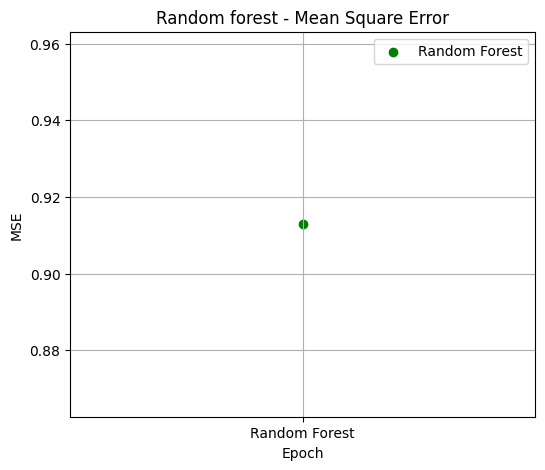

In [16]:
# visualizing the outputs
plt.figure(figsize=(6, 5))
plt.scatter(["Random Forest"], [history_RForest], color='green')

plt.plot(history_RForest)
plt.title('Random forest - Mean Square Error')
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.grid(True)
plt.legend(["Random Forest"])
plt.show()

### Task II - Visualize MSE for Linear Regression, SVM, Random Forest
II-Visualize the MSE error against Epoch for 3 algorithms in one line plot, with different colors for each algorithm. A legend should be on the top corner ("SVM", "LR", "RF") (3 pts-Mandatory)

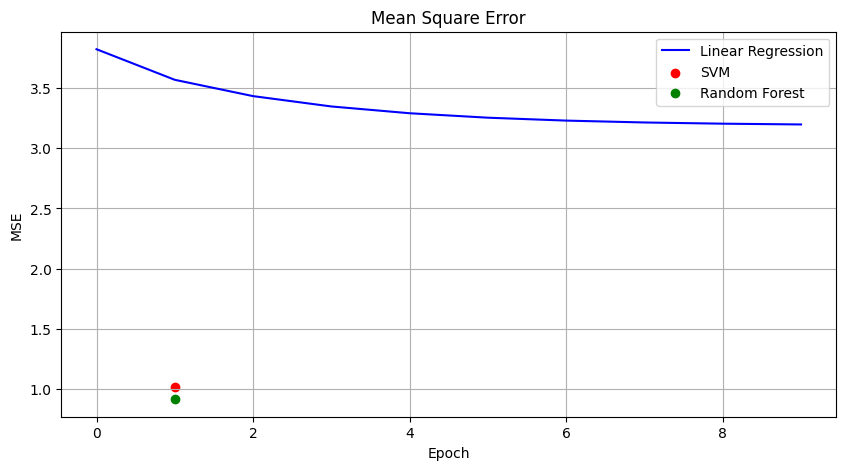

In [21]:
# Visualizing
epochs = list(range(len(history)))


plt.figure(figsize=(10, 5))
plt.plot(epochs, history, color='blue', label="Linear Regression")
plt.scatter([1], [history_SVM[0]], color='red', label="SVM")
plt.scatter([1], [history_RForest[0]], color='green', label="Random Forest")

plt.title('Mean Square Error')
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.grid(True)
plt.legend(loc= 'upper right')

plt.savefig('MSE_Task-II.png')
plt.show()

